# 카테고리형 다루기

In [1]:
import pandas as pd
df = pd.read_csv('data/scores.csv')
df.head()

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
1,Charles,90.0,80.0,75.0
2,Danial,95.0,100.0,100.0
3,Evan,100.0,100.0,100.0
4,Henry,NaN,35.0,60.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    30 non-null     object 
 1   kor     27 non-null     float64
 2   eng     28 non-null     float64
 3   math    29 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [3]:
# 결측치 삭제
df.dropna(inplace=True)

In [4]:
# 결측치 확인
df.isnull().sum()

name    0
kor     0
eng     0
math    0
dtype: int64

In [5]:
df['average']=round((df.kor+df.eng+df.math)/3,1)
df.head()

,name,kor,eng,math,average
0,Aiden,100.0,90.0,95.0,95.0
1,Charles,90.0,80.0,75.0,81.7
2,Danial,95.0,100.0,100.0,98.3
3,Evan,100.0,100.0,100.0,100.0
5,Ian,90.0,100.0,90.0,93.3


In [6]:
def get_grad(x):
    if x>=90:
        return 1
    elif x>= 80:
        return 2
    elif x>=70:
        return 3
    elif x>=60:
        return 4
    else:
        return 5
    
df['grade'] = df['average'].apply(get_grad)
df.head()

,name,kor,eng,math,average,grade
0,Aiden,100.0,90.0,95.0,95.0,1
1,Charles,90.0,80.0,75.0,81.7,2
2,Danial,95.0,100.0,100.0,98.3,1
3,Evan,100.0,100.0,100.0,100.0,1
5,Ian,90.0,100.0,90.0,93.3,1


In [7]:
df.dtypes

name        object
kor        float64
eng        float64
math       float64
average    float64
grade        int64
dtype: object

In [8]:
df['grade']=df['grade'].astype('category')

In [9]:
df.dtypes

name         object
kor         float64
eng         float64
math        float64
average     float64
grade      category
dtype: object

In [10]:
df['grade'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [11]:
df['grade'].cat.categories = ['A','B','C','D']
df

,name,kor,eng,math,average,grade
0,Aiden,100.0,90.0,95.0,95.0,A
1,Charles,90.0,80.0,75.0,81.7,B
2,Danial,95.0,100.0,100.0,98.3,A
3,Evan,100.0,100.0,100.0,100.0,A
5,Ian,90.0,100.0,90.0,93.3,A
6,James,70.0,75.0,65.0,70.0,C
7,Julian,80.0,90.0,55.0,75.0,C
8,Justin,50.0,60.0,100.0,70.0,C
9,Kevin,100.0,100.0,90.0,96.7,A
10,Leo,90.0,95.0,70.0,85.0,B


In [12]:
# 누락된 카테고리 추가
df['grade'] = df['grade'].cat.set_categories(['A','B','C','D','F'])
df['grade'].dtypes

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'F'], ordered=False)

In [13]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [15]:
df_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [20]:
# 카테고리형 바꾸기 용량을 줄일 수 있다.
df_titanic['Survived'] = df_titanic['Survived'].astype('category')
df_titanic['Pclass'] = df_titanic['Pclass'].astype('category')
df_titanic['Sex'] = df_titanic['Sex'].astype('category')
df_titanic['Embarked'] = df_titanic['Embarked'].astype('category')

In [21]:
df_titanic.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

# datetime 자료형에서 정보 추출

In [22]:
import pandas as pd
df = pd.read_csv('data/birth_die.csv')
df

,이름,주요경력,출생,사망
0,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14
1,마이클잭슨,가수,1958-08-29,2009-06-25
2,스티브잡스,CEO,1955-02-24,2011-10-05
3,로빈윌리엄스,배우,1951-07-21,2014-08-11
4,앨빈토플러,미래학자,1928-10-04,2016-06-27


In [23]:
df.dtypes

이름      object
주요경력    object
출생      object
사망      object
dtype: object

In [24]:
# 출생, 사망 컬럼을 자료형으로 변경하기
df['출생'] = pd.to_datetime(df['출생'])

In [25]:
df['사망']=pd.to_datetime(df['사망'])

In [26]:
df.dtypes

이름              object
주요경력            object
출생      datetime64[ns]
사망      datetime64[ns]
dtype: object

In [27]:
df['출생'][0].year

1942

In [28]:
df['출생'].dt.year

0    1942
1    1958
2    1955
3    1951
4    1928
Name: 출생, dtype: int64

In [29]:
df['생존일수'] = df['사망']-df['출생']
df

,이름,주요경력,출생,사망,생존일수
0,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14,27824 days
1,마이클잭슨,가수,1958-08-29,2009-06-25,18563 days
2,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days
3,로빈윌리엄스,배우,1951-07-21,2014-08-11,23032 days
4,앨빈토플러,미래학자,1928-10-04,2016-06-27,32043 days


In [30]:
df['생존기간']=df['사망'].dt.year-df['출생'].dt.year

In [31]:
df

,이름,주요경력,출생,사망,생존일수,생존기간
0,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14,27824 days,76
1,마이클잭슨,가수,1958-08-29,2009-06-25,18563 days,51
2,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56
3,로빈윌리엄스,배우,1951-07-21,2014-08-11,23032 days,63
4,앨빈토플러,미래학자,1928-10-04,2016-06-27,32043 days,88


In [32]:
df['출생'].dt.strftime('%a')

0    Thu
1    Fri
2    Thu
3    Sat
4    Thu
Name: 출생, dtype: object

In [33]:
# 출생요일 추가하기
df['출생요일'] = df['출생'].dt.strftime('%a')
df

,이름,주요경력,출생,사망,생존일수,생존기간,출생요일
0,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14,27824 days,76,Thu
1,마이클잭슨,가수,1958-08-29,2009-06-25,18563 days,51,Fri
2,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56,Thu
3,로빈윌리엄스,배우,1951-07-21,2014-08-11,23032 days,63,Sat
4,앨빈토플러,미래학자,1928-10-04,2016-06-27,32043 days,88,Thu


In [34]:
# 출생월 추가하기
df['출생월'] = df['출생'].dt.strftime('%B')
df

,이름,주요경력,출생,사망,생존일수,생존기간,출생요일,출생월
0,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14,27824 days,76,Thu,January
1,마이클잭슨,가수,1958-08-29,2009-06-25,18563 days,51,Fri,August
2,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56,Thu,February
3,로빈윌리엄스,배우,1951-07-21,2014-08-11,23032 days,63,Sat,July
4,앨빈토플러,미래학자,1928-10-04,2016-06-27,32043 days,88,Thu,October


In [35]:
# 출생 칼럼을 인덱스로 만들기
df.index = df['출생']
df

,이름,주요경력,출생,사망,생존일수,생존기간,출생요일,출생월
출생,,,,,,,,
1942-01-08,스티븐 호킹,이론 물리학자,1942-01-08,2018-03-14,27824 days,76,Thu,January
1958-08-29,마이클잭슨,가수,1958-08-29,2009-06-25,18563 days,51,Fri,August
1955-02-24,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56,Thu,February
1951-07-21,로빈윌리엄스,배우,1951-07-21,2014-08-11,23032 days,63,Sat,July
1928-10-04,앨빈토플러,미래학자,1928-10-04,2016-06-27,32043 days,88,Thu,October


In [36]:
# 1955년 출생 데이터 추출하기
df.loc['1955']

,이름,주요경력,출생,사망,생존일수,생존기간,출생요일,출생월
출생,,,,,,,,
1955-02-24,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56,Thu,February


In [37]:
df.loc['1955-02']

,이름,주요경력,출생,사망,생존일수,생존기간,출생요일,출생월
출생,,,,,,,,
1955-02-24,스티브잡스,CEO,1955-02-24,2011-10-05,20677 days,56,Thu,February


# 데이터프레임 그룹핑과 재구조화

In [38]:
import pandas as pd

In [39]:
# 샘플 데이터
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df3 = pd.DataFrame([['e', 5, '!'], ['f', 6, '@']], columns=['letter', 'number', 'etc'])

In [40]:
df1

,letter,number
0,a,1
1,b,2


In [41]:
df2

,letter,number
0,c,3
1,d,4


In [42]:
df3

,letter,number,etc
0,e,5,!
1,f,6,@


## 컬럼명 기준으로 연결하기

In [43]:
df_rowconcat = pd.concat([df1,df2,df3])
df_rowconcat

,letter,number,etc
0,a,1,NaN
1,b,2,NaN
0,c,3,NaN
1,d,4,NaN
0,e,5,!
1,f,6,@


In [44]:
# 공통적인 컬럼만 연결하기
df_rowconcat = pd.concat([df1,df2,df3], join='inner')
df_rowconcat

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4
0,e,5
1,f,6


In [45]:
df_rowconcat.loc[0]

,letter,number
0,a,1
0,c,3
0,e,5


In [46]:
# 인덱스 재지정
df_rowconcat = pd.concat([df1,df2,df3], join='inner', ignore_index=True)
df_rowconcat

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6


## 열로 연결하기

In [47]:
# 샘플 데이터
df4 = pd.DataFrame({'age':[20,21,22]},index = ['amy','james','david'])
df5 = pd.DataFrame({'phone':['010-111-1111','010-222-2222','010-333-3333']},index = ['amy','james','david']
)
df6 = pd.DataFrame({'job':['student','programmer','ceo','designer']},index = ['amy','james','david','J']
)

In [48]:
df4

,age
amy,20
james,21
david,22


In [49]:
df5

,phone
amy,010-111-1111
james,010-222-2222
david,010-333-3333


In [50]:
df6

,job
amy,student
james,programmer
david,ceo
J,designer


### 인덱스를 기준으로 연결하기

In [51]:
df_column_concat = pd.concat([df4,df5,df6],axis=1)

### 공통된 인덱스만 남기기

In [52]:
df_column_concat = pd.concat([df4,df5,df6],axis=1, join='inner')
df_column_concat

,age,phone,job
amy,20,010-111-1111,student
james,21,010-222-2222,programmer
david,22,010-333-3333,ceo


## 공통된 열을 기준으로 연결(merge)

In [53]:
df = pd.read_csv('data/scores.csv')
df7 = df.loc[[1,2,3]][['name','eng']]
df8 = df.loc[[1,2,4]][['name','math']]

In [54]:
df7

,name,eng
1,Charles,80.0
2,Danial,100.0
3,Evan,100.0


In [55]:
df8

,name,math
1,Charles,75.0
2,Danial,100.0
4,Henry,60.0


### 공통 데이터만으로 연결

In [56]:
# 기본적으로 inner 조인
pd.merge(df7,df8,on='name')

,name,eng,math
0,Charles,80.0,75.0
1,Danial,100.0,100.0


In [57]:
pd.merge(df7,df8,on='name', how='inner')

,name,eng,math
0,Charles,80.0,75.0
1,Danial,100.0,100.0


In [58]:
pd.merge(df7,df8,on='name', how='outer')

,name,eng,math
0,Charles,80.0,75.0
1,Danial,100.0,100.0
2,Evan,100.0,NaN
3,Henry,NaN,60.0


### 왼쪽 데이터 프레임 기준으로 연결

In [59]:
# df7 기준
pd.merge(df7,df8,on='name', how='left')

,name,eng,math
0,Charles,80.0,75.0
1,Danial,100.0,100.0
2,Evan,100.0,NaN


In [60]:
# df8 기준
pd.merge(df7,df8,on='name', how='right')

,name,eng,math
0,Charles,80.0,75.0
1,Danial,100.0,100.0
2,Henry,NaN,60.0


# 열과 행 바꾸기

## 열을 행으로 보내기

In [61]:
import pandas as pd
df = pd.read_csv('data/scores.csv')
df = df.head(2)
df

,name,kor,eng,math
0,Aiden,100.0,90.0,95.0
1,Charles,90.0,80.0,75.0


In [62]:
#모든 열 행으로 바꾸기
df.melt()

,variable,value
0,name,Aiden
1,name,Charles
2,kor,100.0
3,kor,90.0
4,eng,90.0
5,eng,80.0
6,math,95.0
7,math,75.0


In [63]:
# 고정할 컬럼 지정하여 melt
df.melt(id_vars ='name')

,name,variable,value
0,Aiden,kor,100.0
1,Charles,kor,90.0
2,Aiden,eng,90.0
3,Charles,eng,80.0
4,Aiden,math,95.0
5,Charles,math,75.0


In [64]:
# name, kor 고정
df.melt(id_vars =['name','kor'])

,name,kor,variable,value
0,Aiden,100.0,eng,90.0
1,Charles,90.0,eng,80.0
2,Aiden,100.0,math,95.0
3,Charles,90.0,math,75.0


In [65]:
# 행으로 위치를 변경할 열 지정
df.melt(id_vars='name',value_vars='kor')

,name,variable,value
0,Aiden,kor,100.0
1,Charles,kor,90.0


In [66]:
df.melt(id_vars='name',value_vars=['kor','eng'])

,name,variable,value
0,Aiden,kor,100.0
1,Charles,kor,90.0
2,Aiden,eng,90.0
3,Charles,eng,80.0


In [68]:
# 컬럼명 변경하기
df.melt(id_vars='name',value_vars=['kor','eng'], var_name='subject', value_name='score')

,name,subject,score
0,Aiden,kor,100.0
1,Charles,kor,90.0
2,Aiden,eng,90.0
3,Charles,eng,80.0


## 행을 열로 보내기

In [69]:
# 샘플데이터
df = pd.read_csv('data/scores.csv')
df = df.head(2)
df = df.melt(id_vars = 'name', var_name='subject',value_name='score')

def get_grade(x):
    if x>=90: grade='A'
    elif x>=80: grade='B'
    elif x>=70: grade='C'
    elif x>=60: grade='D'
    else: grade='F'
    return grade

df['grade'] = df['score'].apply(get_grade)
df = df.sort_values('name')
df

,name,subject,score,grade
0,Aiden,kor,100.0,A
2,Aiden,eng,90.0,A
4,Aiden,math,95.0,A
1,Charles,kor,90.0,A
3,Charles,eng,80.0,B
5,Charles,math,75.0,C


In [70]:
# name, subject, score
df.pivot(index='name', columns='subject', values='score')

subject,eng,kor,math
name,,,
Aiden,90.0,100.0,95.0
Charles,80.0,90.0,75.0


In [71]:
df.pivot(index='name', columns='subject', values='grade')

subject,eng,kor,math
name,,,
Aiden,A,A,A
Charles,B,A,C


In [75]:
df.pivot(index='name', columns='subject', values=['score','grade'])

score              grade         
subject   eng    kor  math   eng kor math
name                                     
Aiden    90.0  100.0  95.0     A   A    A
Charles  80.0   90.0  75.0     B   A    C

In [76]:
df.pivot(index='name', columns='subject')

score              grade         
subject   eng    kor  math   eng kor math
name                                     
Aiden    90.0  100.0  95.0     A   A    A
Charles  80.0   90.0  75.0     B   A    C

## 행과 열 바꾸기

In [77]:
df.head()

,name,subject,score,grade
0,Aiden,kor,100.0,A
2,Aiden,eng,90.0,A
4,Aiden,math,95.0,A
1,Charles,kor,90.0,A
3,Charles,eng,80.0,B


In [78]:
df.transpose()

,0,2,4,1,3,5
name,Aiden,Aiden,Aiden,Charles,Charles,Charles
subject,kor,eng,math,kor,eng,math
score,100.0,90.0,95.0,90.0,80.0,75.0
grade,A,A,A,A,B,C


## 행을 열로 보내기

In [79]:
# 샘플데이터
df = pd.DataFrame({"item": ["shirts", "shirts", "shirts", "shirts", "shirts",
                          "pants", "pants", "pants", "pants"],
                    "color": ["white", "white", "white", "black", "black",
                          "white", "white", "black", "black"],
                   "size": ["small", "large", "large", "small",
                          "small", "large", "small", "small",
                         "large"],
                   "sale": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "inventory": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [80]:
df

,item,color,size,sale,inventory
0,shirts,white,small,1,2
1,shirts,white,large,2,4
2,shirts,white,large,2,5
3,shirts,black,small,3,5
4,shirts,black,small,3,6
5,pants,white,large,4,6
6,pants,white,small,5,8
7,pants,black,small,6,9
8,pants,black,large,7,9


In [82]:
# items, size 별 재고 합계
df.pivot_table(index='item',columns='size',values='inventory',aggfunc='sum')

size,large,small
item,,
pants,15,17
shirts,9,13


In [84]:
# [item, color], size 별 재고 합계
df.pivot_table(index=['color','item'],columns='size',values='inventory',aggfunc='sum')

size          large  small
color item                
black pants     9.0    9.0
      shirts    NaN   11.0
white pants     6.0    8.0
      shirts    9.0    2.0

In [85]:
# null값은 0처리
df.pivot_table(index=['color','item'],columns='size',values='inventory',aggfunc='sum', fill_value=0)

size          large  small
color item                
black pants       9      9
      shirts      0     11
white pants       6      8
      shirts      9      2

In [86]:
# # [item, color], size 별 판매, 재고 합계
df.pivot_table(index=['color','item'],columns=['sale','size'],values='inventory',aggfunc='sum')

sale             1     2     3     4     5     6     7
size         small large small large small small large
color item                                            
black pants    NaN   NaN   NaN   NaN   NaN   9.0   9.0
      shirts   NaN   NaN  11.0   NaN   NaN   NaN   NaN
white pants    NaN   NaN   NaN   6.0   8.0   NaN   NaN
      shirts   2.0   9.0   NaN   NaN   NaN   NaN   NaN

## 타이타닉호 성별, 객실등급별 생존분석

In [87]:
import pandas as pd
df = pd.read_csv('data/titanic.csv')
df_titanic = df[['Survived','Pclass','Sex','Age','Embarked']]
df_titanic = df_titanic.dropna()
df_titanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [88]:
len(df_titanic)

1044

### 성별, 객실등급별 승선자 수

In [91]:
df_titanic.pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='count', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,131,103,152,386
male,151,158,349,658
All,282,261,501,1044


### 성별, 객실등급별 생존자수

In [96]:
df_titanic.pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='sum', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,128,97,97,322
male,40,15,38,93
All,168,112,135,415


### 성별, 객실등급별 생존율


In [97]:
df_titanic.pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='mean', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.977099,0.941748,0.638158,0.834197
male,0.264901,0.094937,0.108883,0.141337
All,0.595745,0.429119,0.269461,0.397510


In [98]:
df_titanic.pivot_table(index='Sex',columns='Pclass',values='Survived', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.977099,0.941748,0.638158,0.834197
male,0.264901,0.094937,0.108883,0.141337
All,0.595745,0.429119,0.269461,0.397510


# 그룹화하여 데이터집계하기

In [101]:
import pandas as pd
df = pd.read_csv('data/titanic.csv')
df = df[['Survived','Pclass','Sex','Age','Embarked']]
df = df.dropna()
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [102]:
len(df)

1044

## 그룹의 통계값 계산하기

* <b>df.groupby(그룹기준컬럼).통계적용컬럼.통계함수</b>
* count() : 누락값을 제외한 데이터 수
* size() : 누락값을 포함한 데이터 수
* mean() : 평균
* sum() : 합계
* std() : 표준편차
* min() : 최소값
* max() : 최대값
* sum() : 전체 합

In [105]:
# Pclass별 승선자 수 구한후 df로 만들기
df1 = df.groupby('Pclass').Survived.count().to_frame()
df1

,Survived
Pclass,
1,282
2,261
3,501


In [107]:
# 객실등급별 생존자 수를 df2로
df2 = df.groupby('Pclass').Survived.sum().to_frame()
df2

,Survived
Pclass,
1,168
2,112
3,135


In [108]:
# 객실등급별 생존율 df3
df3 = df.groupby('Pclass').Survived.mean().to_frame()
df3

,Survived
Pclass,
1,0.595745
2,0.429119
3,0.269461


In [112]:
# 객실등급별 탑승자수, 생존자수, 생존율 데이터프레임 df4
df4 = pd.concat([df1,df2,df3], axis=1)
df4.columns=['승선자수','생존자수','생존율']
df4

,승선자수,생존자수,생존율
Pclass,,,
1,282,168,0.595745
2,261,112,0.429119
3,501,135,0.269461


## 성별 생존 통계

In [113]:
# 성별 승선자 수 df5
df5 = df.groupby('Sex').Survived.count().to_frame()
df5

,Survived
Sex,
female,386
male,658


In [114]:
# 성별 생존자 수 df 6
df6 = df.groupby('Sex').Survived.sum().to_frame()
df6

,Survived
Sex,
female,322
male,93


In [115]:
# 생존율 df7
df7 = df.groupby('Sex').Survived.mean().to_frame()
df7

,Survived
Sex,
female,0.834197
male,0.141337


In [117]:
df8 = pd.concat([df5,df6,df7],axis=1)
df8.columns =['승선자수','생존자수','생존율']
df8

,승선자수,생존자수,생존율
Sex,,,
female,386,322,0.834197
male,658,93,0.141337


## 성별, 객실등급별 생존통계

In [119]:
# 성별, 객실등급별 생존율
df.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.977099
        2         0.941748
        3         0.638158
male    1         0.264901
        2         0.094937
        3         0.108883
Name: Survived, dtype: float64

## 그룹에 사용자정의함수 적용하기

In [120]:
def my_mean(values):
    return sum(values)/len(values)

In [121]:
df.groupby(['Sex','Pclass']).Survived.agg(my_mean)

Sex     Pclass
female  1         0.977099
        2         0.941748
        3         0.638158
male    1         0.264901
        2         0.094937
        3         0.108883
Name: Survived, dtype: float64

## 그룹 오브젝트 출력하기

In [122]:
df20 = df[:20]
df20.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [123]:
len(df20)

20

In [125]:
# Pclass 기존 그룹 수
df20.groupby('Pclass').groups

{1: [1, 3, 6, 11], 2: [9, 15, 20, 21], 3: [0, 2, 4, 7, 8, 10, 12, 13, 14, 16, 18, 22]}

In [126]:
# Pclass 그룹 출력(1등석)
df20.groupby('Pclass').get_group(1)

,Survived,Pclass,Sex,Age,Embarked
1,1,1,female,38.0,C
3,1,1,female,35.0,S
6,0,1,male,54.0,S
11,1,1,female,58.0,S


In [127]:
# Pclass 그룹 출력(2등석)
df20.groupby('Pclass').get_group(2)

,Survived,Pclass,Sex,Age,Embarked
9,1,2,female,14.0,C
15,1,2,female,55.0,S
20,0,2,male,35.0,S
21,1,2,male,34.0,S


# 서울시 코로나19 현황분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

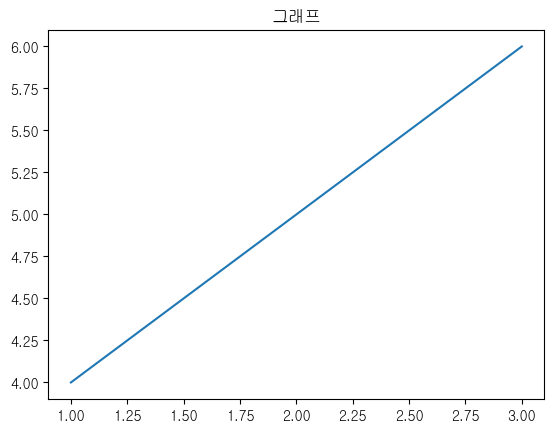

In [135]:
plt.plot([1,2,3],[4,5,6])
plt.title('그래프')
plt.show()

In [149]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'Gulim'

In [150]:
# 폰트 확인하기
[f.name for f in fm.fontManager.ttflist if 'Gulim' in f.name]

['Gulim', 'Gulim']

In [151]:
# 한글이 깨지지 않기위해 encoding = 'cp949' / 해도 안되면 엑셀을 열어야함
# 엑셀 1번행에 컬럼명이 아니라면 삭제하기 데이터 중간에 , 있는지 확인 컨트롤 F
# csv utf-8형태로 다시 저장하기 / 없으면 메모장으로 열어서 다른이름저장으로 인코딩=utf8로 저장
df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv', low_memory=False)

In [152]:
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


## 데이터 확인 및 전처리

In [153]:
# nan인 컬럼 삭제
df['상태'].unique()

array(['-', '퇴원', '사망', '42'], dtype=object)

### 불필요한 컬럼삭제

In [154]:
df.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','등록일','수정일','노출여부'],inplace=True)
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


### 자료형 변환

In [156]:
# 자료형 확인 날짜는 object보다 datetime으로 바꾸기 / 지역은 카테고리 추천 / 상태도 카테고리
# 확정적인 답은 카테고리 사용 why? 메모리 줄여줌 
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [159]:
# 확진일 -> datetime
df['확진일'] = pd.to_datetime(df['확진일'])

In [160]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [163]:
# 지역의 공백 제거 서울시 자치구는 총 25개 오류가 있다
df['지역'].nunique()

29

In [165]:
# 공백이 들어가있어 데이터가 중복됨 공백제거하기.
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [167]:
df['지역'] = df['지역'].str.strip()

In [169]:
df['지역'].nunique()

27

In [171]:
# 카테고리형 변환
df['지역'] = df['지역'].astype('category')

In [172]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object

In [173]:
# 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


## 결측치 분석

In [174]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

## 일 * 구별 확진자 동향

### 피봇테이블 만들기

In [176]:
import pandas as pd

In [181]:
df_gu = pd.pivot_table(df, index='확진일', columns='지역', values='연번', aggfunc='count', margins=True)
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


### 서울시 일별 확진자 동향

In [184]:
s_date = df_gu['All'][:-1]
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [186]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

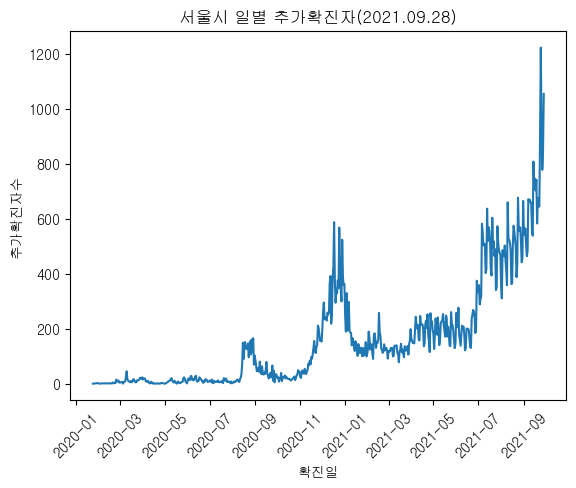

In [192]:
# 서울시 일별 추가확진자 시각화
x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 추가확진자(2021.09.28)')
plt.xlabel('확진일')
plt.ylabel('추가확진자수')
plt.xticks(rotation=45)
plt.show()

In [198]:
# 서울시 구별 누적확진자 비교
s_gu= df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

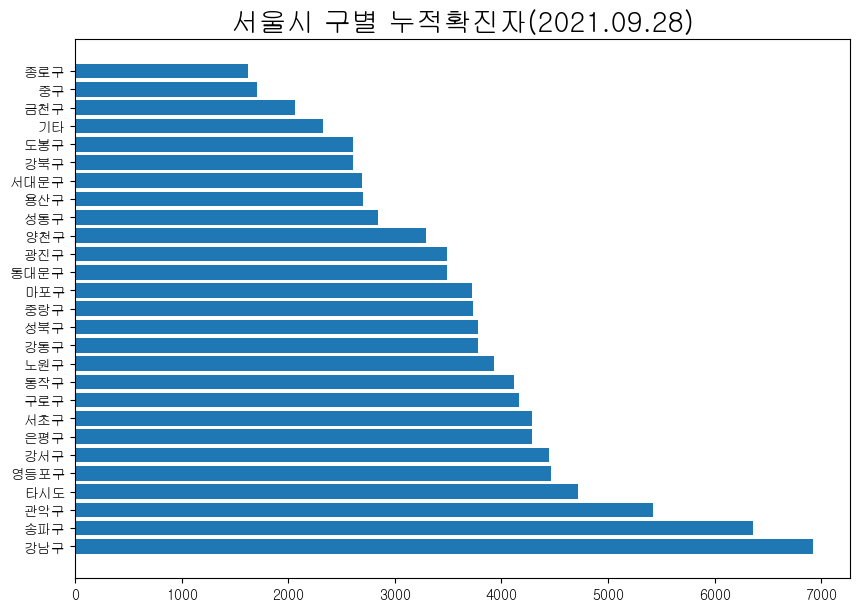

In [202]:
# 서울시 구별 누적확진자 많은 순으로 시각화
x = s_gu.index
y = s_gu.values

plt.figure(figsize=(10,7)) # 항상 위쪽에 적용하기
plt.title('서울시 구별 누적확진자(2021.09.28)', size=20)
plt.barh(x,y)
plt.show()

### 최근일 기준 지역별 추가확진자

In [206]:
s_gu = df_gu.iloc[-2][:-1]
s_gu.sort_values(ascending=False)

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

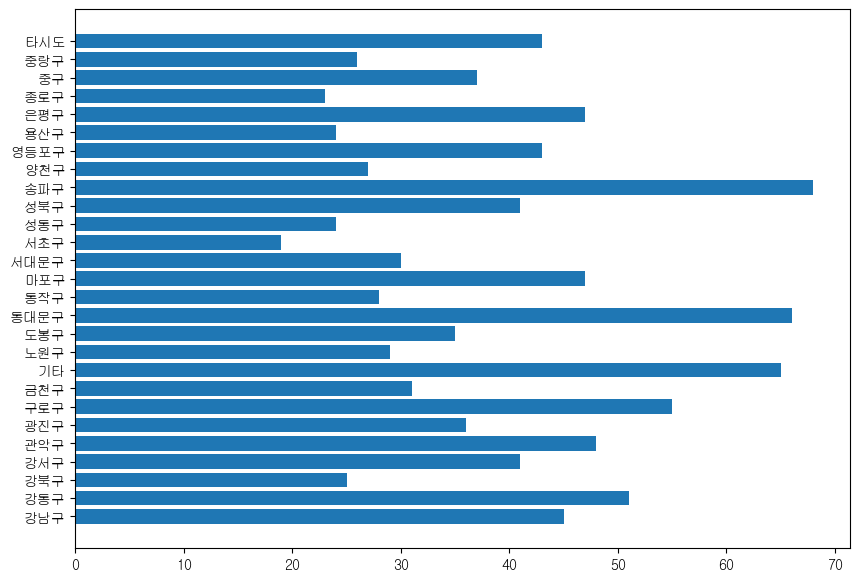

In [209]:
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(10,7))
plt.barh(x,y)
plt.show()

## 접촉력에 따른 확진 분석

In [210]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


In [212]:
# 접촉력에 따른 best 10
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [216]:
df[(df['확진일'].dt.year==2021)&(df['확진일'].dt.month==9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44


# 서울시 공공자전거

In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [4]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

KeyboardInterrupt: 

In [ ]:
df1.head()

## 데이터 연결 및 확인

In [225]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [226]:
df.tail(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [227]:
# 데이터 크기
df.shape

(13613873, 11)

In [228]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [254]:
# 자전거번호, 대여거치대, 반납거치대 제거
df = df.drop(columns=['자전거번호','대여거치대','반납거치대'])
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
dtypes: category(2), datetime64[ns](2), float64(2), object(3)
memory usage: 883.1+ MB


### 자료형 확인 / 변경

In [233]:
# 자료형 확인
df.dtypes

자전거번호        object
대여일시         object
대여 대여소번호      int64
대여 대여소명      object
대여거치대        object
반납일시         object
반납대여소번호      object
반납대여소명       object
반납거치대         int64
이용시간        float64
이용거리        float64
dtype: object

In [235]:
df['대여 대여소번호'].nunique()

2493

In [236]:
# 카테코리형으로 변경  대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [237]:
df.dtypes

자전거번호         object
대여일시          object
대여 대여소번호    category
대여 대여소명       object
대여거치대         object
반납일시          object
반납대여소번호     category
반납대여소명        object
반납거치대          int64
이용시간         float64
이용거리         float64
dtype: object

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype   
---  ------    -----   
 0   자전거번호     object  
 1   대여일시      object  
 2   대여 대여소번호  category
 3   대여 대여소명   object  
 4   대여거치대     object  
 5   반납일시      object  
 6   반납대여소번호   category
 7   반납대여소명    object  
 8   반납거치대     int64   
 9   이용시간      float64 
 10  이용거리      float64 
dtypes: category(2), float64(2), int64(1), object(6)
memory usage: 1.1+ GB


In [241]:
# 대여 일시와 반납일시 datetime 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [242]:
# 에러났을 경우 대체법
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [243]:
df.dtypes

자전거번호               object
대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
대여거치대               object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
반납거치대                int64
이용시간               float64
이용거리               float64
dtype: object

### 결측치 확인/처리

In [244]:
df.isnull().sum()

자전거번호         0
대여일시          0
대여 대여소번호      0
대여 대여소명       0
대여거치대         0
반납일시        123
반납대여소번호       0
반납대여소명        0
반납거치대         0
이용시간          0
이용거리        269
dtype: int64

In [246]:
# 결측치 제거
df.dropna(inplace=True)

In [247]:
# 결측치 확인
df.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

## 일별 이용현황

In [248]:
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05
...,...,...,...,...,...,...,...,...,...,...,...
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00


In [251]:
# year, month, day, date
df['대여날짜'] = df['대여일시'].dt.date

In [252]:
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여날짜
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00,2021-01-02
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00,2021-01-04
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99,2021-01-13
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00,2021-01-14
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36,2021-06-30
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71,2021-06-30
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00,2021-06-30
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00,2021-06-30


### 대여날짜별 대여 건수

In [257]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()

In [259]:
df_count.columns=['대여건수']

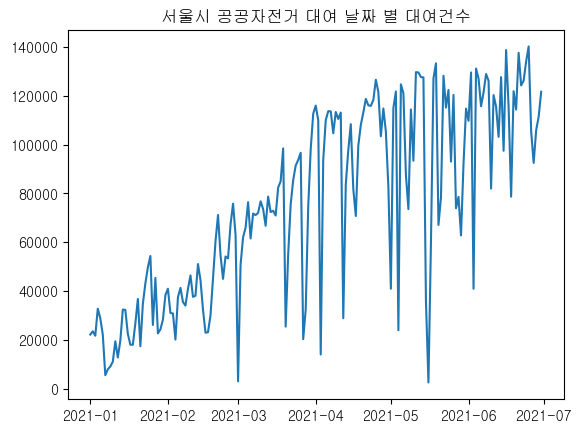

In [261]:
df_count
plt.plot(df_count.index,df_count.values)
plt.title('서울시 공공자전거 대여 날짜 별 대여건수')
plt.show()

### 대여날짜 별 이용시간

In [262]:
# 대여날짜 별 이용시간 추출
df_time = df.groupby('대여날짜').이용시간.sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


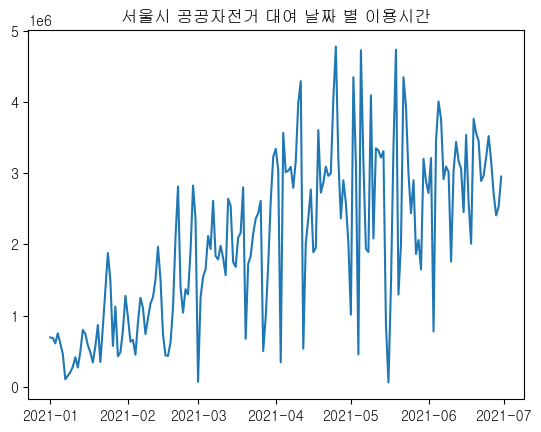

In [263]:
df_time
plt.plot(df_time.index,df_time['이용시간'])
plt.title('서울시 공공자전거 대여 날짜 별 이용시간')
plt.show()

### 대여날짜 별 이용 거리

In [264]:
df_distance = df.groupby('대여날짜').이용거리.sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


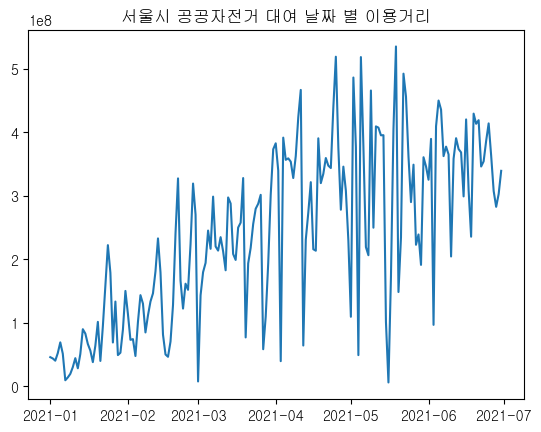

In [268]:
df_distance
plt.plot(df_distance.index,df_distance['이용거리'])
plt.title('서울시 공공자전거 대여 날짜 별 이용거리')
plt.show()

### 데이터 프레임 합치기

In [272]:
df_date = pd.concat([df_time,df_distance,df_count], axis=1)
df_date

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882
